In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

In [2]:
data = pd.read_csv("Cleaned_data.csv")

In [3]:
df = data.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.6,9.1,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,8.0,8.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,8.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,7.8,11.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.0,12.8,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,1.0,3.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,2.6,11.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  object 
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  object 
 10  WindDir3pm     142193 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

## FEATURE ENGINEERING

We will be adding Months from the 'Date' feature in our dataset, as with every month season changes and chances of rainfall is related with the change in season.

In [5]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,2.6,9.1,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,0.0,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,8.0,8.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,8.0,17.2,24.3,No,0.0,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,7.8,11.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,0.0,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,5.0,12.8,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,1.0,3.0,18.1,26.5,No,1.0,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,2.6,11.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12


Now let us look at our categorical features.

In [6]:
cat = [i for i in df.select_dtypes('object')]
cat

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

We have already used 'Date' to make a 'Month' column, so we can drop this feature from our dataset.

In [7]:
df.drop('Date', axis = 1, inplace = True)

In [8]:
cat = [i for i in df.select_dtypes('object')]
cat

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

Let us look at the no. of unique values in each categorical feature.

In [9]:
for i in cat:
    print(i,":%d"%df[i].nunique())

Location :49
WindGustDir :16
WindDir9am :16
WindDir3pm :16
RainToday :2
RainTomorrow :2


Now if we perfom a one hot encoding on the categorical features, it would create a large no. of columns thus increasing the dimension of our dataset. We will try to reduce the no. of columns

As we know that Month, Wind Direction are cyclic variables. We can transform the categorical label of these features to a continous values using cyclic transformation with the help of sine and cosine.

In [10]:
df['Month_Sin'] = np.sin((df['Month'])*(2.*np.pi/12))
df['Month_Cos'] = np.cos((df['Month'])*(2.*np.pi/12))

<AxesSubplot:xlabel='Month_Sin', ylabel='Month_Cos'>

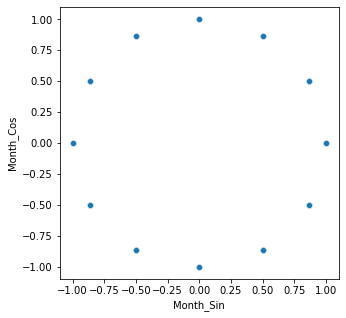

In [11]:
plt.figure(figsize = (5,5))
sns.scatterplot(df['Month_Sin'],df['Month_Cos'])

In [12]:
wind_dict = {'N':1,'NNW':2,'NW':3,'WNW':4,
             'W':5,'WSW':6,'SW':7,'SSW':8,
             'S':9,'SSE':10,'SE':11,'ESE':12,
             'E':13,'ENE':14,'NE':15,'NNE':16}

df['WindGustDir'] = df['WindGustDir'].map(wind_dict)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_dict)
df['WindDir9am'] = df['WindDir9am'].map(wind_dict)

df['WindGustDir_sin'] = np.sin((df['WindGustDir'])*(2*np.pi/16))
df['WindGustDir_cos'] = np.cos((df['WindGustDir'])*(2*np.pi/16))

df['WindDir9am_sin'] = np.sin((df['WindDir9am'])*(2*np.pi/16))
df['WindDir9am_cos'] = np.cos((df['WindDir9am'])*(2*np.pi/16))

df['WindDir3pm_sin'] = np.sin((df['WindDir3pm'])*(2*np.pi/16))
df['WindDir3pm_cos'] = np.cos((df['WindDir3pm'])*(2*np.pi/16))

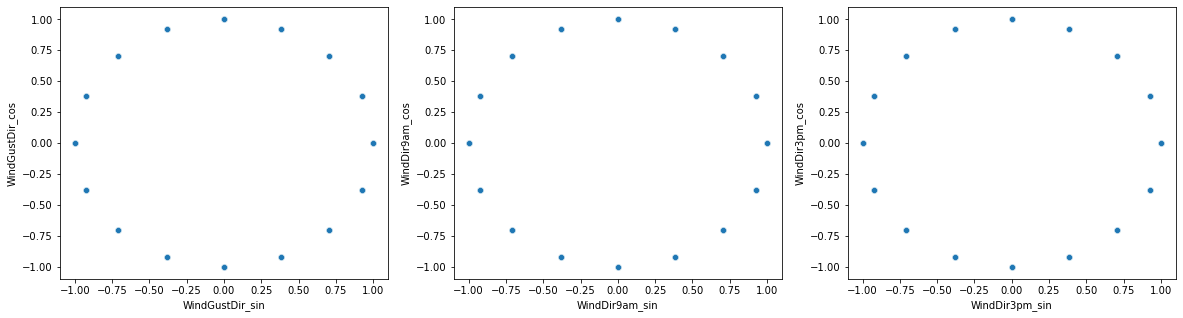

In [13]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.scatterplot(df['WindGustDir_sin'],df['WindGustDir_cos'])

plt.subplot(1,3,2)
sns.scatterplot(df['WindDir9am_sin'],df['WindDir9am_cos'])

plt.subplot(1,3,3)
sns.scatterplot(df['WindDir3pm_sin'],df['WindDir3pm_cos'])

plt.show()

Now we can drop 'Month','WindGustDir','WindDir9am' and 'WindDir3pm' features from our dataset

In [14]:
df.drop(['Month','WindGustDir','WindDir9am','WindDir3pm'], axis = 1, inplace = True)

### The Case of 'RISK_MM'

RISK_MM is the amount of rainfall in millimeters for the next day. It includes all forms of precipitation that reach the ground, such as rain, drizzle, hail and snow. And it was the column that was used to actually determine whether or not it rained to create the binary target. Since it contains information directly about the target variable, including it would leak the future information to our model. So we will have to drop this feature.

In [15]:
df.drop('RISK_MM', axis = 1, inplace = True)

Mapping the 'Yes' and 'No' in 'RainToday' and 'RainTomorrow' with 1 and 0 respectively.

In [16]:
df['RainToday'] = df['RainToday'].map({'Yes':1,'No':0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1,'No':0})

In [17]:
X = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

In [18]:
#One Hot Encoding

X_dummies = pd.get_dummies(X, drop_first = True)
print('No. of features after performing One-Hot Encoding: ', X_dummies.shape[1])

No. of features after performing One-Hot Encoding:  73


## MODEL FITTING

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

In [20]:
def fit_model (model, X_train, y_train, X_test, y_test):
    '''Fits the passed model to the train set and 
    generates a detailed classification report with plots'''
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    print("Precision: %0.4f"%precision_score(y_test,y_pred))
    print("Recall:    %0.4f"%recall_score(y_test,y_pred))
    print("F1 Score:  %0.4f"%f1_score(y_test,y_pred))
    print("\n\nCONFUSION MATRIX:\n")
    print(confusion_matrix(y_test,y_pred))
    print("\n\nCLASSIFICATION REPORT\n")
    print(classification_report(y_test,y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    print("AUC Score: %0.4f"%roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_dummies,y,test_size = 0.33,stratify=y,random_state=42)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

### Base Model:

Base Logistic: 

Precision: 0.7303
Recall:    0.4984
F1 Score:  0.5925


CONFUSION MATRIX:

[[34469  1936]
 [ 5276  5243]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     36405
           1       0.73      0.50      0.59     10519

    accuracy                           0.85     46924
   macro avg       0.80      0.72      0.75     46924
weighted avg       0.84      0.85      0.84     46924



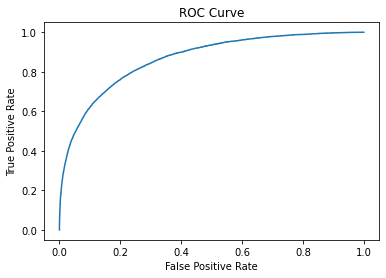

AUC Score: 0.8649


In [23]:
print("Base Logistic: \n")
fit_model(LogisticRegression(),X_train,y_train,X_test,y_test)

__*Now let us fix the class imbalance problem then try to fit a model.*__

0    77.58
1    22.42
Name: RainTomorrow, dtype: float64


[]

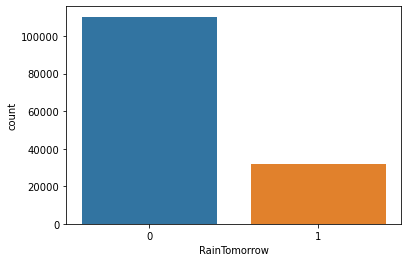

In [24]:
print(round((y.value_counts()/y.shape[0])*100,2))

sns.countplot(y)
plt.plot()

In our target feature, the no. of 'No' instances (77.58%) is far greater than the no. of 'Yes' instances (22.42). This is clearly a case of class imbalance. To solve this we will apply to resampling techniques.

1) Combination of UnderSampling and OverSampling

2) SMOTE

In [25]:
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline

### 1) Combination of UnderSampling and OverSampling

In [26]:
under = RandomUnderSampler(sampling_strategy=0.5)
over = RandomOverSampler()
pipe = Pipeline([('u',under),('o',over)])

In [27]:
X_train_comb,y_train_comb = pipe.fit_resample(X_train,y_train)

The Distribution of classes in the trainig set before and after resampling: 


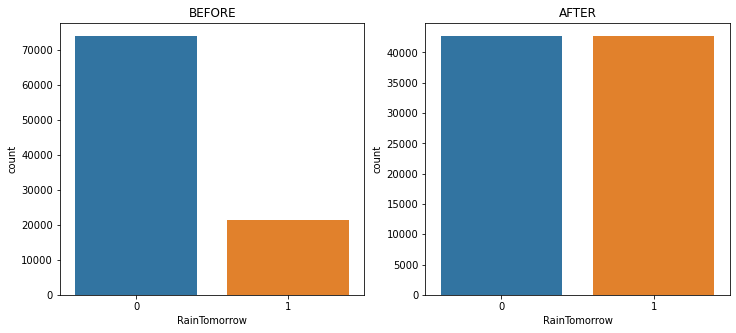

In [28]:
print("The Distribution of classes in the trainig set before and after resampling: ")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("BEFORE")

plt.subplot(1,2,2)
sns.countplot(y_train_comb)
plt.title("AFTER")

plt.show()

No. of observations decreased because of the UnderSampling

After Using Combination of Oversampling & Undersampling: 

Precision: 0.5163
Recall:    0.7718
F1 Score:  0.6188


CONFUSION MATRIX:

[[28800  7605]
 [ 2400  8119]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     36405
           1       0.52      0.77      0.62     10519

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.74     46924
weighted avg       0.83      0.79      0.80     46924



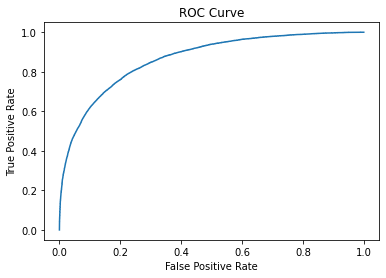

AUC Score: 0.8654


In [29]:
print("After Using Combination of Oversampling & Undersampling: \n")
fit_model(LogisticRegression(),X_train_comb,y_train_comb,X_test,y_test)

* On comparing this model with our base model, we can see a significant increase in the F1 score (from 0.59 to 0.62)


* For class 1, the recall increased from 0.4984 to 0.7717 but the precision fell heavily from 0.7303 to 0.5161 which was expected as we have resampled the dataset because as we resample the dataset, the model is presented with more instances of minority class, therefore it is more likely that the model will optimise itself to recognise minority class instances


### 2) SMOTE

In [30]:
smote = SMOTE()

In [31]:
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

The Distribution of classes in the trainig set before and after resampling: 


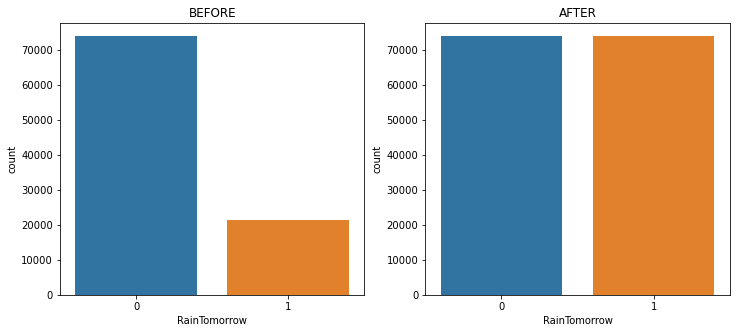

In [32]:
print("The Distribution of classes in the trainig set before and after resampling: ")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title("BEFORE")

plt.subplot(1,2,2)
sns.countplot(y_train_sm)
plt.title("AFTER")

plt.show()

The no. of observation in SMOTE resampling remained the same because SMOTE oversamples the minority class.

After SMOTE Resampling: 

Precision: 0.5201
Recall:    0.7662
F1 Score:  0.6196


CONFUSION MATRIX:

[[28967  7438]
 [ 2459  8060]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.80      0.85     36405
           1       0.52      0.77      0.62     10519

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.74     46924
weighted avg       0.83      0.79      0.80     46924



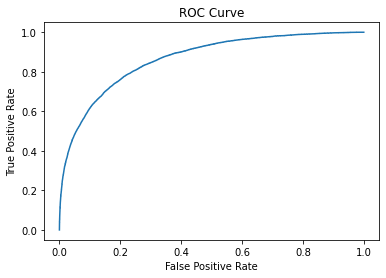

AUC Score: 0.8650


In [33]:
print("After SMOTE Resampling: \n")
fit_model(LogisticRegression(),X_train_sm,y_train_sm,X_test,y_test)

* For class 1, we can see a very slight increase precision and and a little decrease in recall on comparing this model (Trained on SMOTE resampled data) with the previous model.


* The F1 score remained the same (0.62).


* We can see that both the resampling technique has definitely improved our model as compared with the base model.

### _Extracting more relevant features to the model using Recursive Feature Elimination._

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(solver = 'saga'))

In [35]:
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)

In [36]:
print("No. of features before appling RFE: ",X_train.shape[1])
print("No. of features after appling RFE: ",rfe.n_features_)

No. of features before appling RFE:  73
No. of features after appling RFE:  36


In [37]:
col = X_dummies.columns
selected_features = np.where(rfe.support_)

print("The Selected Features are: \n")
for i in selected_features:
    print(list(col[i]))

The Selected Features are: 

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday', 'Month_Sin', 'Month_Cos', 'WindDir3pm_sin', 'WindDir3pm_cos', 'Location_Albany', 'Location_Ballarat', 'Location_Cairns', 'Location_CoffsHarbour', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_MelbourneAirport', 'Location_MountGinini', 'Location_Newcastle', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Sale', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Wollongong', 'Location_Woomera']


__*Applying the combination of UnderSampling and OverSampling on the new training set with the extracted features and fitting a model on it.*__

In [38]:
X_train_comb_rfe,y_train_comb_rfe = pipe.fit_resample(X_train_rfe,y_train)

After extracting important features and applying comibnation of UnderSampling and OverSampling: 

Precision: 0.5142
Recall:    0.7729
F1 Score:  0.6176


CONFUSION MATRIX:

[[28725  7680]
 [ 2389  8130]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     36405
           1       0.51      0.77      0.62     10519

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.73     46924
weighted avg       0.83      0.79      0.80     46924



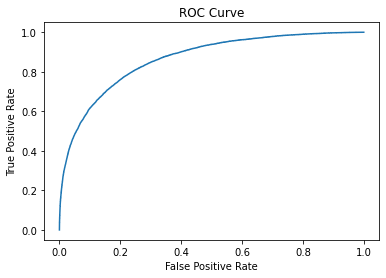

AUC Score: 0.8645


In [39]:
print("After extracting important features and applying comibnation of UnderSampling and OverSampling: \n")
fit_model(LogisticRegression(),X_train_comb_rfe,y_train_comb_rfe,X_test_rfe,y_test)

__*Applying SMOTE Resampling on the new training set with the extracted features and fitting a model on it.*__

In [40]:
X_train_sm_rfe,y_train_sm_rfe = smote.fit_resample(X_train_rfe,y_train)

SMOTE Resampling on Extracted Features: 

Precision: 0.5158
Recall:    0.7697
F1 Score:  0.6177


CONFUSION MATRIX:

[[28804  7601]
 [ 2422  8097]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     36405
           1       0.52      0.77      0.62     10519

    accuracy                           0.79     46924
   macro avg       0.72      0.78      0.73     46924
weighted avg       0.83      0.79      0.80     46924



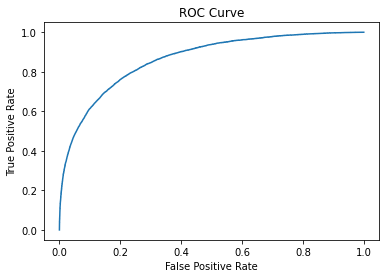

AUC Score: 0.8641


In [41]:
print("SMOTE Resampling on Extracted Features: \n")
fit_model(LogisticRegression(),X_train_sm_rfe,y_train_sm_rfe,X_test_rfe,y_test)

__We are getting same results even with half of the features.__

## HYPERTUNING THE PARAMETERS

As both the resampling techniques are giving similar results, we will Hypertune the parameters of our models to try to get better results in both the resampling techniques.

In [42]:
from sklearn.model_selection import GridSearchCV

### 1) Hypertuning the Combined Resampled Model.

In [43]:
pipe_comb = Pipeline([('u',under),('o',over),('log',LogisticRegression())])
params = {'u__sampling_strategy':(0.2,0.4,0.5)
         ,'o__sampling_strategy':(0.5,0.75,1)
         ,'log__C':(0.01,0.1,1,100)}
gcv_comb = GridSearchCV(pipe_comb, param_grid = params, cv = 5, scoring = 'f1', n_jobs = -1)

In [44]:
gcv_comb.fit(X_train_rfe, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('u',
                                        RandomUnderSampler(sampling_strategy=0.5)),
                                       ('o', RandomOverSampler()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': (0.01, 0.1, 1, 100),
                         'o__sampling_strategy': (0.5, 0.75, 1),
                         'u__sampling_strategy': (0.2, 0.4, 0.5)},
             scoring='f1')

Precision: 0.5633
Recall:    0.7095
F1 Score:  0.6280


CONFUSION MATRIX:

[[30620  5785]
 [ 3056  7463]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     36405
           1       0.56      0.71      0.63     10519

    accuracy                           0.81     46924
   macro avg       0.74      0.78      0.75     46924
weighted avg       0.83      0.81      0.82     46924



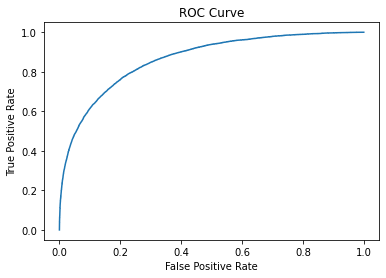

AUC Score: 0.8645

Best Parameters:  {'log__C': 1, 'o__sampling_strategy': 0.75, 'u__sampling_strategy': 0.4}


In [45]:
y_pred_comb = gcv_comb.predict(X_test_rfe)

print("Precision: %0.4f"%precision_score(y_test,y_pred_comb))
print("Recall:    %0.4f"%recall_score(y_test,y_pred_comb))
print("F1 Score:  %0.4f"%f1_score(y_test,y_pred_comb))
print("\n\nCONFUSION MATRIX:\n")
print(confusion_matrix(y_test,y_pred_comb))
print("\n\nCLASSIFICATION REPORT\n")
print(classification_report(y_test,y_pred_comb))
    
fpr, tpr, thresholds = roc_curve(y_test, gcv_comb.predict_proba(X_test_rfe)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
    
print("AUC Score: %0.4f"%roc_auc_score(y_test,gcv_comb.predict_proba(X_test_rfe)[:,1]))
print("\nBest Parameters: ",gcv_comb.best_params_)

__*Comparing this Hyptertuned Model with the previous model fitted on the SMOTE Resampling Technique.*__

* The F1 score increased from 0.62 to 0.63.

* For class 1, the recall decreased from 0.7697 to 0.7095 but we can observe an increase in precision from 0.5158 to 0.5633.

* We can also observe a slight increase in the AUC score from 0.8641 to 0.8645.

* Grid Search selects the best parameters for sampling startegy in case of UnderSampling as 0.4 and in case of OverSampling as 0.75.

### 2) Hypertuning the SMOTE Model.

In [46]:
pipe_smote = Pipeline([('sm',smote),('log',LogisticRegression())])
params = {'sm__sampling_strategy':(0.5,0.75,1)
         ,'log__C':(0.01,0.1,1,100)}
gcv_smote = GridSearchCV(pipe_smote, param_grid = params, cv = 5, scoring = 'f1', n_jobs = -1)

In [47]:
gcv_smote.fit(X_train_rfe, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sm', SMOTE()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': (0.01, 0.1, 1, 100),
                         'sm__sampling_strategy': (0.5, 0.75, 1)},
             scoring='f1')

Precision: 0.5615
Recall:    0.7116
F1 Score:  0.6277


CONFUSION MATRIX:

[[30559  5846]
 [ 3034  7485]]


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     36405
           1       0.56      0.71      0.63     10519

    accuracy                           0.81     46924
   macro avg       0.74      0.78      0.75     46924
weighted avg       0.83      0.81      0.82     46924



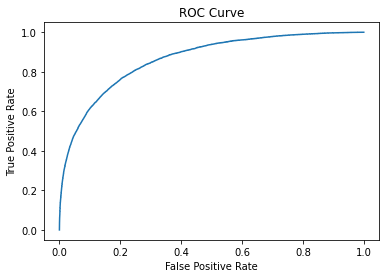

AUC Score: 0.8642

Best Parameters:  {'log__C': 100, 'sm__sampling_strategy': 0.75}


In [48]:
y_pred_smote = gcv_smote.predict(X_test_rfe)

print("Precision: %0.4f"%precision_score(y_test,y_pred_smote))
print("Recall:    %0.4f"%recall_score(y_test,y_pred_smote))
print("F1 Score:  %0.4f"%f1_score(y_test,y_pred_smote))
print("\n\nCONFUSION MATRIX:\n")
print(confusion_matrix(y_test,y_pred_smote))
print("\n\nCLASSIFICATION REPORT\n")
print(classification_report(y_test,y_pred_smote))
    
fpr, tpr, thresholds = roc_curve(y_test, gcv_smote.predict_proba(X_test_rfe)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
    
print("AUC Score: %0.4f"%roc_auc_score(y_test,gcv_smote.predict_proba(X_test_rfe)[:,1]))
print("\nBest Parameters: ",gcv_smote.best_params_)

__*For Hyptertuned Model on SMOTE Resampling Technique*__

* The F1 score remains the same (0.63) as the previously fitted hypertuned model.

* For class 1, precision remained somewhat same but a slight increase in recall can be observed. ( From 0.7095 to 0.7116)

* The best parameter for sampling strategy in SMOTE selected by Hyptertuning is 0.75.

## CONCLUSIONS:

* The F1 score of the models increased after we applied the resampling techniques.

* The F1 score of the models fitted on both the Resampling technique is same.

* We are achieving same results even with half of the no. of features after applying Recursive Feature Elimination.

* The models showed slight imporvement in their scores after hyptertuning their parameters.

* The SMOTE Hypertuned Model is giving out best result on comparing it with the other models.